In [70]:
test = "Raw Operational Data from Enterprise Application - KAGGLE.zip (Unzipped Files)/2014/2014-CW-1/lphost07_wls1_unix-process_prod-appserver_2014.12.31_00.00.00.csv"

In [71]:
import pandas as pd
import gensim
import json

# Load the cluster word sets from the JSON file
with open('cluster_word_sets.json', 'r') as json_file:
    cluster_word_sets = json.load(json_file)

# Function to clean and preprocess column names
def clean_and_preprocess(col_names):
    cleaned_cols = []
    for col in col_names:
        # Clean and preprocess the column name using gensim
        cleaned_col = gensim.utils.simple_preprocess(col)
        cleaned_cols.extend(cleaned_col)
    return cleaned_cols

# Function to calculate similarity between two lists of strings
def similarity(list1, list2):
    common_elements = set(list1) & set(list2)
    total_elements = set(list1) | set(list2)
    return len(common_elements) / len(total_elements)

# Load the new log file as a DataFrame
new_log_file = pd.read_csv(test)

# Clean and preprocess the column names of the new log file
new_log_columns = clean_and_preprocess(new_log_file.columns.tolist())

# Initialize variables to track the most similar cluster
most_similar_cluster = None
highest_similarity = 0.0

# Compare the new log file columns with each cluster's word set
for cluster_num, cluster_words in cluster_word_sets.items():
    sim_score = similarity(new_log_columns, cluster_words)
    if sim_score > highest_similarity:
        highest_similarity = sim_score
        most_similar_cluster = cluster_num

# Print the cluster that the new log file belongs to
print(f"The new log file belongs to Cluster {most_similar_cluster}")

The new log file belongs to Cluster 1


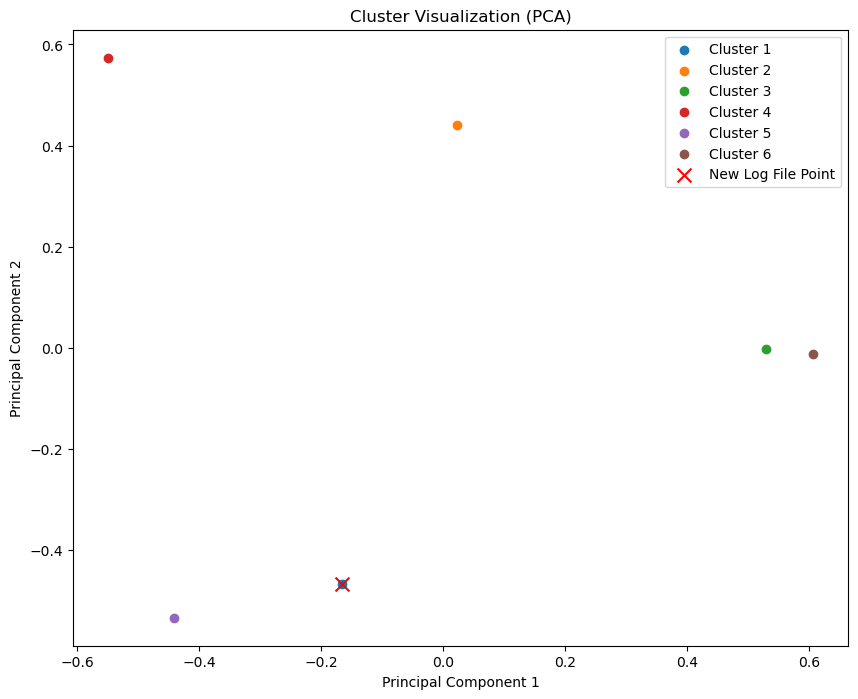

In [73]:
import pandas as pd
import gensim
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load the cluster word sets from the JSON file
with open('cluster_word_sets.json', 'r') as json_file:
    cluster_word_sets = json.load(json_file)

# Convert word sets into text documents (one document per cluster)
cluster_documents = [' '.join(word_set) for word_set in cluster_word_sets.values()]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_documents)

# Add a new log file point (you need to specify its cluster label)
new_log_file_cluster_label = int(most_similar_cluster) - 1  # Change this to the cluster label of the new log file

# Create a 2D PCA plot (you can use PCA to reduce dimensions)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Create a list of cluster labels
cluster_labels = list(cluster_word_sets.keys())

# Create a scatter plot with different colors for clusters and the new log file point
plt.figure(figsize=(10, 8))

for label in cluster_labels:
    cluster_indices = [i for i, l in enumerate(cluster_labels) if l == label]
    cluster_points = np.array([pca_result[i] for i in cluster_indices])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

# Plot the new log file point in red
new_log_file_point = pca_result[new_log_file_cluster_label]
plt.scatter(new_log_file_point[0], new_log_file_point[1], c='red', marker='x', s=100, label='New Log File Point')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization (PCA)')

# Add a legend
plt.legend()

plt.show()
